## The Future Ad - In Vehicle Coupon Aceptance Analysis

- Group members

  - Nirvi Shah: shah.nirv@northeastern.edu
  - Vy Nguyen: nguyen.let@northeastern.edu
  - Zichen Fan: fan.zic@northeastern.edu


## 1.Objective:

Background: Our company is an advertisement company. Recently, we are doing a research on coupon acceptance. We collected data from a survey, that we ask people if they will accept the coupon if the person were the driver. Basically, this reseach is trying to figure out whether people would accept the coupon under certain conditions, so we can provide the most efficient marketing strategy to our clients. This notebook provides a thorough analysis on in-vehicle coupon recomendation dataset, and the workflow of this notebook followed is from Exploratory data analysis to model building and performance evaluation, we will then compare all models and select the best one. Models we will implement include Logistic Regression, Naive Bayes, Support Vector Machine, Decision tree, KNN, etc.    

### 1.1 Dataset

in-vehicle coupon recommendation. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5GS4P.

1. destination: No Urgent Place, Home, Work
2. passenger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
3. weather: Sunny, Rainy, Snowy
4. temperature:55, 80, 30
5. time: 2PM, 10AM, 6PM, 7AM, 10PM
6. coupon: Restaurant(<$20), Coffee House, Carry out & Take away, Bar, Restaurant(`$20 - $50`)

7. expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
8. gender: Female, Male
9. age: 21, 46, 26, 31, 41, 50plus, 36, below21
10. maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
11. has_Children:1, 0
12. education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
13. occupation: Unemployed, Architecture & Engineering, Student,
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
14. income: 37500 - 49999, 62500 - 74999, 12500 - 24999, 75000 - 87499,
50000 - 62499, 25000 - 37499, 100000 or More, 87500 - 99999, Less than 12500
15. Bar: never, less1, 1-3, gt8,  nan4-8 (feature meaning: how many times do you go to a bar every month?)
16. CoffeeHouse: never, less1, 4-8, 1-3, gt8,  nan (feature meaning: how many times do you go to a coffeehouse every month?)
17. CarryAway:n4-8, 1-3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
18. RestaurantLessThan20: 4-8, 1-3, less1, gt8,  never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)
19. Restaurant20To50: 1-3, less1, never, gt8, 4-8, nan
(feature meaning: how many times do you go to a restaurant with average expense per person of `'$20 - $50`' every month?)
20. toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
21. toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
22. direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
23. direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
24. Y:1, 0 (whether the coupon is accepted)

## 2 Import libraries & Data Overview

In [375]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style = 'whitegrid')
set_palette = sns.color_palette("Accent")
sns.set_palette(set_palette)
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### 2.1 Loading Data


In [376]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [377]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [378]:
#df = pd.read_csv('/content/gdrive/MyDrive/7275 PROJECT 1/in-vehicle-coupon-recommendation.csv')

### 2.2 Data Overview


In [379]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [380]:
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


**Observations**

- `time` shows as 12-hour format, we will change it to 24-hour format to standardize the data

- `expiration` is not the same scale, we will change it to hours for this column
- we also see some 'nan' in the dataset

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [487]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [382]:
#checking # of unique values
info_table = {'col_name':[], 'unique_cat':[]}

for col in df.columns:
  info_table['col_name'].append(col)
  info_table['unique_cat'].append(df[col].unique())
info_table = pd.DataFrame(info_table)

info_table

,col_name,unique_cat
0,destination,"[No Urgent Place, Home, Work]"
1,passanger,"[Alone, Friend(s), Kid(s), Partner]"
2,weather,"[Sunny, Rainy, Snowy]"
3,temperature,"[55, 80, 30]"
4,time,"[2PM, 10AM, 6PM, 7AM, 10PM]"
5,coupon,"[Restaurant(<20), Coffee House, Carry out & Ta..."
6,expiration,"[1d, 2h]"
7,gender,"[Female, Male]"
8,age,"[21, 46, 26, 31, 41, 50plus, 36, below21]"
9,maritalStatus,"[Unmarried partner, Single, Married partner, D..."


**Observations**

- This dataset contains categorical and binary features.

- `toCoupon_GEQ5min` only contains 1 value, and according the the meaning of this attribute, we know that the distance from current location to coupon destination is greater than 5 minuts, so we do not need this feature.


In [383]:
#convert feature to a same metric: time, expiration
from datetime import datetime
def convert_to_24(time):
    time_obj = datetime.strptime(time, '%I%p')
    return time_obj.strftime('%H')

df['time'] = df['time'].apply(convert_to_24)

In [384]:
df['time'].unique()

array(['14', '10', '18', '07', '22'], dtype=object)

In [385]:
def convert_days(exp_time):
    hours = None
    if exp_time.endswith('d'):
        numeric_part = float(exp_time.rstrip('d'))
        hours = numeric_part * 24
    elif exp_time.endswith('h'):
        hours = float(exp_time.rstrip('h'))
    else:
        pass
    return f"{hours}h"

df['expiration'] = df['expiration'].apply(convert_days)

In [386]:
#checking missing values
def check_na(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = round((df.isnull().sum()/df.isnull().count()), 3).sort_values(ascending = False)
  missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent'])
  return missing_data
missing_count = check_na(df)
missing_count[(missing_count>0).any(axis =1)]

,Total,Percent
car,12576,0.991
CoffeeHouse,217,0.017
Restaurant20To50,189,0.015
CarryAway,151,0.012
RestaurantLessThan20,130,0.010
Bar,107,0.008


**Observations**

`Car`: doesn't contain any values in this dataset. We can drop this column based on two reasons; the dataset doesn't provide any feature infromation about `car`. Also, the survey is asking the customer whether he/she would accept the coupon if the person is the driver.

In [387]:
#checking duplicate
df.duplicated().sum()

74

In [388]:
#drop duplicates
duplicate = df[df.duplicated()]
#duplicate.head()

In [389]:
#drop duplicate
df = df.drop_duplicates()
df.duplicated().sum()

0

In [390]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


**Observations**

- `toCoupon_GEQ5min` only contains value 1, meaning the condition given to interviewees is that the distance to the restaurant and bar is greater than 5 mins.
- 40% of the interviewees has children in average
- under condition to coupon distance, average of 50% of condition is set to greater than 15 mins
- under condition direction to the restaurant or bar, most interviewees are asked if the restaurant are in a opposite direction

## 3. Exploratory Data Analysis




- **Target overview**

In [391]:
df.Y.value_counts()/len(df)

1    0.567565
0    0.432435
Name: Y, dtype: float64

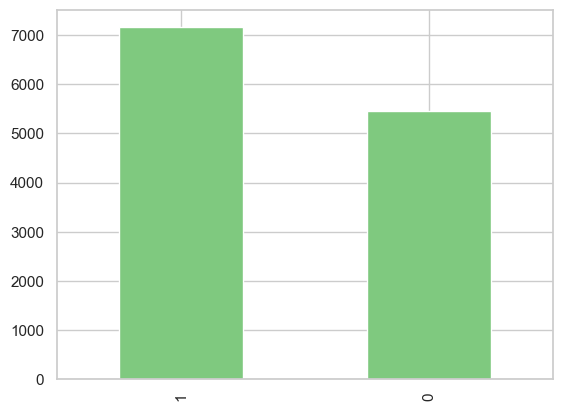

In [392]:
# Target Count
df.Y.value_counts().plot(kind = "bar")
plt.show()

**Obeservations**

- This data has two classes: '0' represents the person doesn’t accept the coupon, and '1' represents someone who accept the coupon.
- As we can see from the plot, 57% people would accept the coupon, and 43% people will not. We don't have a large gap bwteen two classes, so we don't have to worry about imbalanced class


In [393]:
# correlation
df.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


**Observations**

`toCoupon_GEQ5min` contains only 1 value, which is 1, meaning all the given condition is the current distance to the coupon is greater than 5 minuts, so this feature will not make any differences. We will drop it.

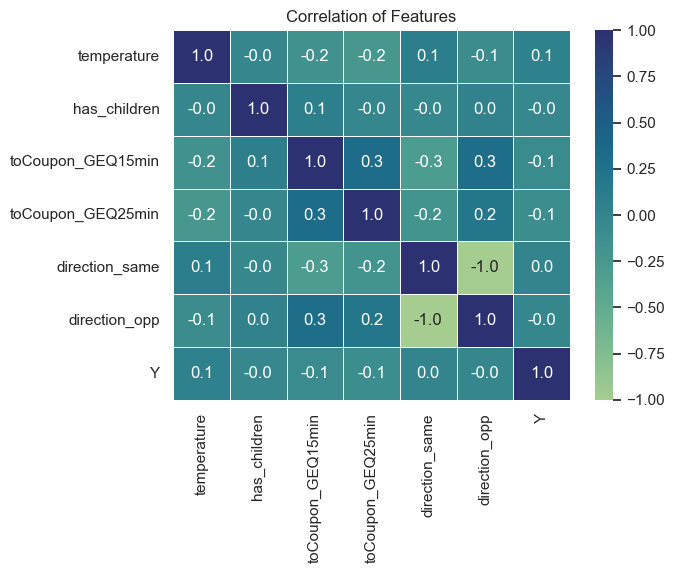

In [394]:
#plot a heatmap
sns.heatmap(df.drop('toCoupon_GEQ5min', axis=1).corr(), annot=True, linewidths=.5, cmap="crest", fmt= '.1f')
plt.title("Correlation of Features")
plt.show()

**Observations**

`direction_opp` and `direction_same` are complement of each other, so we could drop one for further analysis


#### **Univariate Analysis**
- Coupon type vs. Target


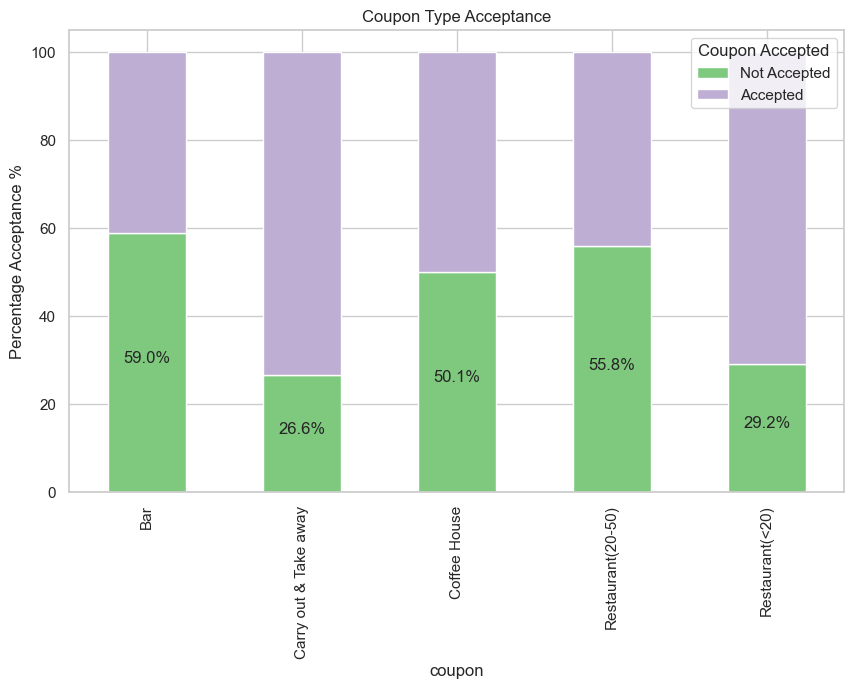

In [471]:
# coupon type vs. target

def addlabels(x, y, decimals=2):
    for i in range(len(x)):
        plt.text(i, y[i] / 2, f'{y[i]:.{decimals}f}%', ha='center')

coupon_bar = pd.crosstab(df['coupon'], df['Y'], normalize = 'index')*100
coupon_bar.plot(kind = 'bar', figsize = (10, 6), stacked = True)

plt.ylabel('Percentage Acceptance %')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'], loc='upper right')
addlabels(coupon_bar.index, coupon_bar[0], decimals=1)
plt.title("Coupon Type Acceptance")
plt.show()

**Observations**

The distribution of coupon acceptance percentages highlights that individuals in the dataset are more inclined to accept 'Carry out & Take away' coupons, making it the most accepted coupon type. On the other hand, 'Bar' coupons exhibit the lowest acceptance rate.

This insight into coupon acceptance percentages can be valuable for marketing strategies, helping businesses focus on promoting and optimizing the usage of more popular coupon types. Further analysis could explore the factors influencing the acceptance rates of different coupon categories.

- Income vs. coupon acceptance

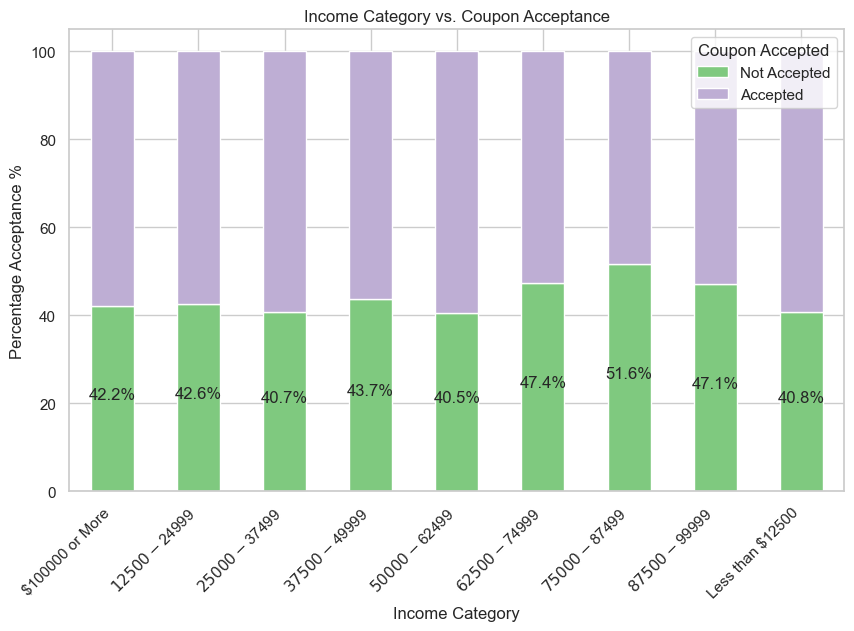

In [396]:

# Define the addlabels function with optional decimal parameter

#def addlabels(x, y, decimals=2):
    #for i in range(len(x)):
        #plt.text(i, y[i] / 2, f'{y[i]:.{decimals}f}%', ha='center')

income_bar = pd.crosstab(df['income'], df['Y'], normalize='index') * 100

# Create a stacked bar plot
income_bar.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Income Category')
plt.ylabel('Percentage Acceptance %')
plt.title('Income Category vs. Coupon Acceptance')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'], loc='upper right')
# Adding labels on top of each bar with 1 decimal place rounding
addlabels(income_bar.index, income_bar[0], decimals=1)

plt.show()

**Observations**

The consistent coupon acceptance rate of around 50% across diverse income categories implies that the likelihood of accepting coupons is relatively uniform, irrespective of individuals' income levels. This observation could be valuable for marketing strategies, indicating that coupon promotions have a moderate and consistent impact across various income groups.

Understanding this uniformity in coupon acceptance rates allows businesses to tailor marketing efforts that resonate with a broad audience, regardless of their income status. Further analysis could delve into specific factors influencing coupon acceptance and identify potential areas for targeted promotional campaigns.

- age vs. Coupon acceptance

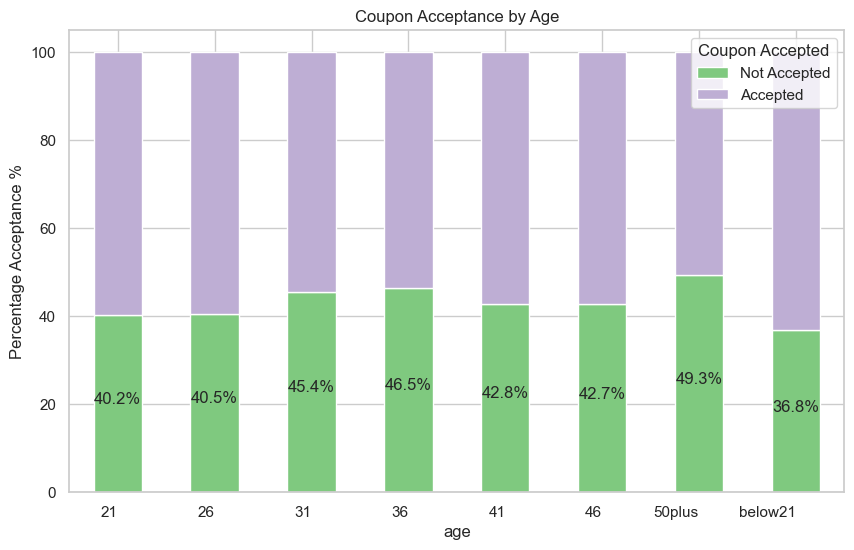

In [397]:
# age vs. coupon acceptance

age_bar = pd.crosstab(df['age'], df['Y'], normalize = 'index')*100
age_bar.plot(kind = 'bar', figsize = (10, 6), stacked = True)

plt.ylabel('Percentage Acceptance %')
plt.xticks(rotation=0, ha='right')
plt.title('Coupon Acceptance by Age')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'], loc='upper right')
addlabels(age_bar.index, age_bar[0], decimals=1)
plt.show()

**Observations**

- accross different age group, there is no large gap among different groups. In average, more people accept the coupon

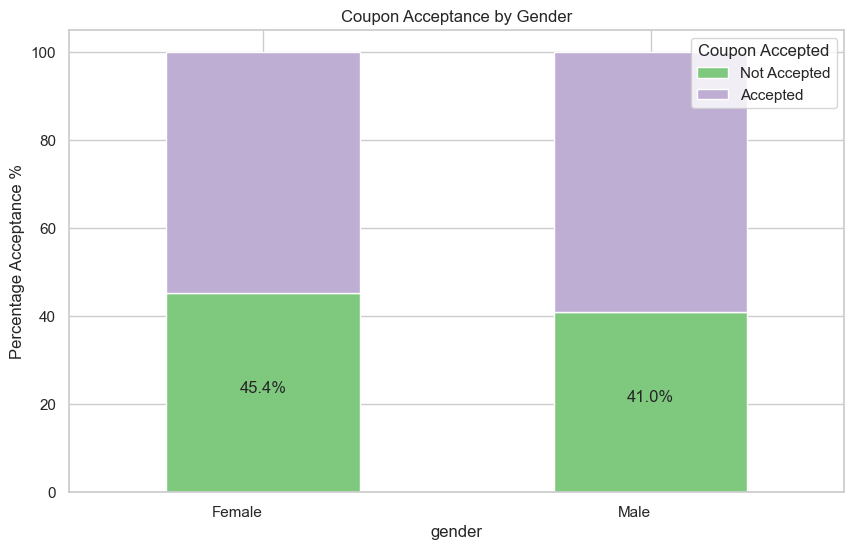

In [398]:
# age vs. coupon acceptance
gender_bar = pd.crosstab(df['gender'], df['Y'], normalize = 'index')*100
gender_bar.plot(kind = 'bar', figsize = (10, 6), stacked = True)

plt.ylabel('Percentage Acceptance %')
plt.xticks(rotation=0, ha='right')
plt.title('Coupon Acceptance by Gender')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'], loc='upper right')
addlabels(gender_bar.index, gender_bar[0], decimals=1)
plt.show()

**Observations**

- female shows slight higher rejection rate than male. Still, gender doesn't cause much differences

#### Bivariate Analysis

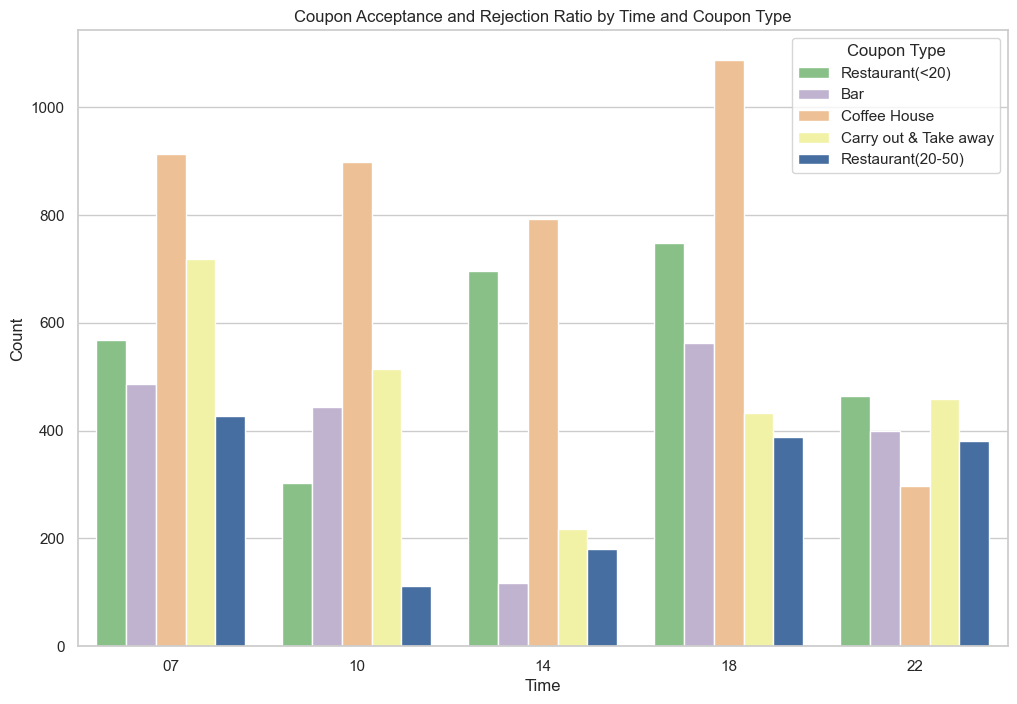

In [399]:
#time vs. coupon type
order_list = ['07', '10', '14', '18', '22']

plt.figure(figsize=(12, 8))
sns.countplot(x='time', hue='coupon', data=df, hue_order=['Restaurant(<20)', 'Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(20-50)'], order=order_list, dodge=True)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Coupon Acceptance and Rejection Ratio by Time and Coupon Type')
plt.legend(title='Coupon Type')
plt.show()

**Observations**

- Across all time throughout the day, coupon for `coffeehouse` is the most popular coupon type, especially at time 6pm, but the acceptance droped at time 10pm  
- Coupon for `bar` has lowest acceptance at 2pm
- Coupon for `restaurant` has highest acceptance at time 2pm and 6pm
- Coupon for `bar` is more popular around 6pm or after, indicating interviewees could be working class.

- People accpet all types of coupon at 7am, 6pm in average.
- Afternoon time around 2pm, it's not a good time for bar, carry out, and restaurant($20-50)
- At night time around 10 pm, all types of coupon has similar acceptance except for coffee house


The time-specific analysis highlights user preferences and rejections for various coupon types. Morning and afternoon hours witness higher acceptance for specific categories, while evening and night hours show preferences for different coupons. Understanding these temporal trends allows businesses to optimize coupon promotions based on the time of the day, tailoring offers to align with user preferences during specific time intervals. Further investigation could explore the underlying factors contributing to these time-specific patterns.

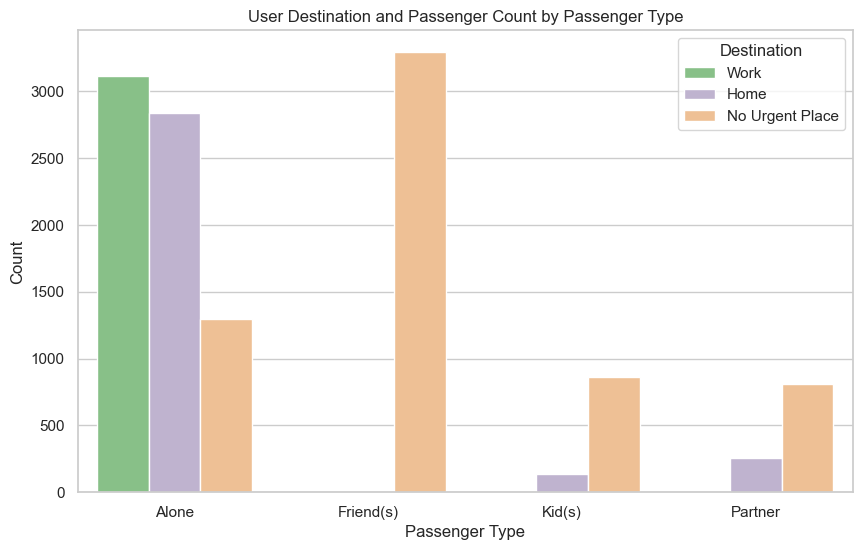

In [464]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'time', 'destination', and 'passenger' are relevant columns
plt.figure(figsize=(10, 6))
sns.countplot(x='passanger', hue='destination', data=df, hue_order=['Work', 'Home', 'No Urgent Place'], dodge=True)
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.title('User Destination and Passenger Count by Passenger Type')
plt.legend(title='Destination')
plt.show()


**Observations**

Passengers with friends have highest frequency with the destination being no urgent place.
Passengers traveling with friends most frequently choose 'No Urgent Place' as their destination.

## 4. Data Preparation

- drop uncesseary features based on EDA

In [401]:
#drop redundant columns
coupon_df = df.drop(['car', 'toCoupon_GEQ5min', 'direction_opp'], axis = 1)

In [402]:
coupon_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,14,Restaurant(<20),24.0h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10,Coffee House,2.0h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10,Carry out & Take away,2.0h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,2.0h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,24.0h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0


In [403]:
#replacing "nan" with "-1"
categorical_feature = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education',
           'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
int_col = ['has_children','toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'Y']

cat_df = coupon_df[categorical_feature].astype(str).apply(lambda x: x.replace('nan', '-1'))
coupon_df = pd.concat([cat_df, coupon_df[int_col]], axis = 1)

In [404]:
object = coupon_df.select_dtypes(include=['object']).copy()

for col in object.columns:
    coupon_df[col]=coupon_df[col].astype('category')

#coupon_df.dtypes

In [405]:
coupon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12610 non-null  category
 1   passanger             12610 non-null  category
 2   weather               12610 non-null  category
 3   time                  12610 non-null  category
 4   coupon                12610 non-null  category
 5   expiration            12610 non-null  category
 6   gender                12610 non-null  category
 7   age                   12610 non-null  category
 8   maritalStatus         12610 non-null  category
 9   education             12610 non-null  category
 10  occupation            12610 non-null  category
 11  income                12610 non-null  category
 12  Bar                   12610 non-null  category
 13  CoffeeHouse           12610 non-null  category
 14  CarryAway             12610 non-null  category
 15  Re

In [406]:
#change int to categorical type
#coupon_df['temperature'] = coupon_df['temperature'].astype('category')

In [407]:
#assign features and target
X = coupon_df.drop('Y', axis=1)
y = coupon_df['Y']

## 5. Feature Engineerin(optional)

## 6. Data Partitioning


In [408]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

print("X_train & y_train: ",X_train.shape, y_train.shape, "\n")
print("X_test & y_test: ",X_test.shape, y_test.shape)

X_train & y_train:  (8827, 21) (8827,) 

X_test & y_test:  (3783, 21) (3783,)


In [409]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 8865 to 8159
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           8827 non-null   category
 1   passanger             8827 non-null   category
 2   weather               8827 non-null   category
 3   time                  8827 non-null   category
 4   coupon                8827 non-null   category
 5   expiration            8827 non-null   category
 6   gender                8827 non-null   category
 7   age                   8827 non-null   category
 8   maritalStatus         8827 non-null   category
 9   education             8827 non-null   category
 10  occupation            8827 non-null   category
 11  income                8827 non-null   category
 12  Bar                   8827 non-null   category
 13  CoffeeHouse           8827 non-null   category
 14  CarryAway             8827 non-null   category
 15  R

### Method 1. Converting data to all categorical using ordinal encoding

- Notes for Ordinal Encoder

- Ordinal encoder is aimed to giving order/rank for categorical data, and the result is an unique number (0 to n-1) for each category. Here we are applying ordinal encoder, but the order has no meaning for this project. Also, we use -1 to represent unknown values.
- we fit the ordinal encoder on train dataset and then transform it to test data.

In [410]:
from sklearn.preprocessing import OrdinalEncoder
cat_col = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education',
           'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same']

#categorical_cols = X_train.select_dtypes(include=['object', 'int64'])

X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

ordinal_encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1, encoded_missing_value=-1)
X_train_1[cat_col] = ordinal_encoder.fit_transform(X_train_1[cat_col])
X_test_1[cat_col] = ordinal_encoder.transform(X_test_1[cat_col])


In [411]:
X_train_1.head()

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
8865,2.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,...,4.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
9246,2.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,5.0,...,5.0,1.0,5.0,1.0,1.0,4.0,1.0,1.0,1.0,0.0
8442,0.0,0.0,2.0,3.0,1.0,0.0,1.0,4.0,1.0,0.0,...,2.0,5.0,5.0,5.0,1.0,5.0,1.0,1.0,0.0,1.0
4841,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,2.0,5.0,...,1.0,5.0,1.0,2.0,1.0,5.0,0.0,1.0,1.0,0.0
10673,0.0,2.0,2.0,4.0,1.0,0.0,0.0,1.0,1.0,5.0,...,2.0,5.0,5.0,1.0,4.0,5.0,1.0,1.0,0.0,0.0


### Method 2. Frequency encoding

This method is assigning frequency for each categorical features. We use train dataset to calculate the frequency of each category, and map it to test data.  


In [412]:
X_train_2 = X_train.copy()
X_test_2 = X_test.copy()

#cat_columns  = X_train.select_dtypes(include = ['category', 'int64']).columns
for col in X_train[cat_col]:
    freq_encoder = X_train_2[col].value_counts(normalize = True).to_dict()
    X_train_2[col] = X_train_2[col].map(freq_encoder)
    X_test_2[col] = X_test_2[col].map(freq_encoder)

In [413]:
#scaling dataset
scaler = StandardScaler()
scaler.fit(X_train_2)

X_train_2_scaled = scaler.transform(X_train_2)
X_test_2_scaled = scaler.transform(X_test_2)

X_train_2_scaled = pd.DataFrame(X_train_2_scaled, columns = X_train_2.columns, index = X_train_2.index)
X_test_2_scaled = pd.DataFrame(X_test_2_scaled, columns = X_test_2.columns, index = X_test_2.index)

In [414]:
X_train_2_scaled.head()

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
8865,-1.027559,0.821602,0.511370,0.858326,1.326137,0.891126,-1.023036,0.921820,0.620071,0.695773,...,0.219974,1.021798,0.613724,0.754852,1.007603,-0.467794,-1.197369,-1.126825,0.362459,-1.903015
9246,-1.027559,0.821602,-1.984875,0.858326,-0.908742,0.891126,-1.023036,-0.239655,0.620071,0.642019,...,-1.652843,-0.771753,0.187722,0.754852,1.007603,0.967794,-1.197369,0.887449,-2.758932,0.525482
8442,-0.967230,0.821602,0.511370,1.080907,-0.513116,-1.122176,-1.023036,-1.260916,0.620071,-1.605336,...,1.062228,1.021798,0.187722,-2.607734,1.007603,-1.025796,-1.197369,0.887449,0.362459,-1.903015
4841,-0.967230,0.821602,0.511370,1.080907,1.326137,-1.122176,0.977482,1.041107,0.398955,0.642019,...,0.579473,1.021798,0.613724,0.495697,1.007603,-1.025796,0.835165,0.887449,-2.758932,0.525482
10673,-0.967230,-1.685155,0.511370,-1.170786,-0.513116,-1.122176,0.977482,0.921820,0.620071,0.642019,...,1.062228,1.021798,0.187722,0.754852,-1.054838,-1.025796,-1.197369,0.887449,0.362459,0.525482


In [415]:
X_train_2_scaled.shape

(8827, 21)

### Method 3. One hot encoding

This method converts the data into a wide structure by extending each subcategories into atrributes. The advantage of this method is to prevent information leakage; on the other hand, it will also increase the dimensiona of the data, which leads to a high computation costs.  

In [416]:
onehot_col = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education',
           'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
int_col3 = ['has_children','toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same']

In [417]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X_train_3 = X_train.copy()
X_test_3 = X_test.copy()

#numerical_features = X_train[int_col3]

# Apply one-hot encoding to categorical variables
oh_encoder = OneHotEncoder(handle_unknown='ignore')
oh_encoder.fit(X_train_3[onehot_col])

X_train_cat_encoded = oh_encoder.transform(X_train_3[onehot_col])
X_test_cat_encoded = oh_encoder.transform(X_test_3[onehot_col])

# Convert the encoded categories back to a DataFrame
columns_encoded = oh_encoder.get_feature_names_out(onehot_col)
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded.toarray(), columns=columns_encoded, index=X_train_3.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded.toarray(), columns=columns_encoded, index=X_test_3.index)


In [418]:
# Handle missing values in numerical variables

X_train_3[int_col3] = X_train[int_col3]
X_test_3[int_col3] = X_test[int_col3]

# Combine the encoded categorical and numerical variables back into the original DataFrame
X_train_3 = pd.concat([X_train_cat_encoded_df, X_train_3[int_col3]], axis=1)
X_test_3 = pd.concat([X_test_cat_encoded_df, X_test_3[int_col3]], axis=1)

In [419]:
X_train_3.head()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_-1,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
8865,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,1
9246,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0
8442,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1
4841,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0
10673,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0


In [420]:
X_train_3.shape

(8827, 111)

## 7. Model Building

- SKlearn model Implement with Three data structure results overview 
- Logistic Regression prediction 
- Categorical Naive Bayes prediction
- SVM 
- Random Forest prediciton
- Neural Network prediction 

In [421]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, precision_recall_fscore_support, log_loss, f1_score


### 7.1 Simple Model fit with Three dataset

**Building Multiple Models with test data**

In this section, we applied three dataset that includes ordinal encoded,frequency encoded, and one-hot encoded dataset into five basic `sklearn` models. The purpose of this is to have a basic idea which data structure and model would be more promising with futher development. (We are showing the results in last section)

In [422]:
from sklearn.base import clone
from sklearn.metrics import precision_recall_fscore_support, roc_curve, roc_auc_score
def fit_regressor(models, datasets):
    """
    models: Logistic Regression, Categorical Naive Bayes, KNN, Decision Tree, Random Forest
    datasets: ordinal encoded, frequency encoded, one-hot encoded
    The purpose of this function is to take a glance at which model and dataset might be good for futher development

    """

    result_table = pd.DataFrame(columns = ['Datasets','Model Name', 'fpr', 'tpr', 'AUC', 'Recall', 'Specificity', 'Precision', 'F1'])
    index = 0

    for dataset_name, data in datasets:
        X_train, X_test, y_train, y_test = data

        for model in models:
            clf = clone(model)
            clf.fit(X_train, y_train)

            yproba = clf.predict_proba(X_test)[::,1]
            ypred = clf.predict(X_test)
            
            
            fpr, tpr, _ = roc_curve(y_test, yproba)
            auc = roc_auc_score(y_test, yproba)

            precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, ypred, average='binary')

            tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
            specificity = tn/(tn+fp)
            #print("TN:", tn, "FP:", fp)  
            #print("Specificity:", specificity)  

            model_name = clf.__class__.__name__

            result_table = result_table.append({'Datasets': dataset_name,
                                                'Model Name': model_name,
                                                'fpr': fpr,
                                                'tpr': tpr,
                                                'AUC':auc, 
                                                'Recall':recall,
                                                'Specificty':specificity,
                                                'Precision': precision, 
                                                'F1': f1_score}, ignore_index = True)
    return result_table

In [423]:
dataset_ordinal = (X_train_1, X_test_1, y_train, y_test)
dataset_freq = (X_train_2_scaled, X_test_2_scaled, y_train, y_test)
dataset_oneHot = (X_train_3, X_test_3, y_train, y_test)

datasets = [('dataset_ordinal', dataset_ordinal),
            ('dataset_freq', dataset_freq),
            ('dataset_OneHot', dataset_oneHot)]

In [424]:
regressor = [LogisticRegression(),
            KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan'),
            DecisionTreeClassifier(),
            RandomForestClassifier()]

In [425]:
result_table = fit_regressor(regressor, datasets)
result_compare = result_table[['Datasets', 'Model Name', 'AUC', 'Recall', 'Precision', 'F1']]

In [463]:
result_compare

,Datasets,Model Name,AUC,Recall,Precision,F1
0,dataset_ordinal,LogisticRegression,0.649792,0.756404,0.634871,0.690329
1,dataset_ordinal,KNeighborsClassifier,0.690852,0.72939,0.679688,0.703662
2,dataset_ordinal,DecisionTreeClassifier,0.668397,0.698649,0.716332,0.70738
3,dataset_ordinal,RandomForestClassifier,0.811613,0.819283,0.756885,0.786849
4,dataset_freq,LogisticRegression,0.634034,0.797857,0.630939,0.704648
5,dataset_freq,KNeighborsClassifier,0.70728,0.755007,0.687739,0.719805
6,dataset_freq,DecisionTreeClassifier,0.682027,0.706102,0.729548,0.717633
7,dataset_freq,RandomForestClassifier,0.818018,0.80857,0.766108,0.786766
8,dataset_OneHot,LogisticRegression,0.7404,0.770377,0.706838,0.737241
9,dataset_OneHot,KNeighborsClassifier,0.710204,0.739637,0.694359,0.716283


### 7.2 Individually Model Developmen for more Detailed Insights

- In section 7.1, we loop through four sklearn models with three data structure, and it gives a basic idea how model fits the data, and the prediction result. In this section, explore more details for individual models including logistic regression, Naive bayes, SVM, Random forest with different cross validation method. This section will also provide a closer look of wrong predictions and how it will affects our business.   


#### 7.2.1 Logistic Regression

**Goal:** predicting whether the person will accept the coupon if the person were the driver.

There will two types of wrong predictions:
1. Predicting a person will accept the coupon when the person doesn't accept
2. Predicting a person will not accept the coupon when the person accept it

Which case is more important?

- **Predicting that the person will not accept the coupon when the person accept it.** For example, distributing coupon aims encourage consumption. If a person is waiting for a coupon to try a restaurant, while we predict the person will not accept, this leads to a mistake in targeting customers.

How to reduce this loss i.e the need to reduce False positives?

- We want the **Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall (minimizing the false negatives) or in other words identifying the true positives (i.e. Class 1) very well, so we can target more customers with the desire of the coupon.


In [427]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Accept', 'Accept'], yticklabels=['Not Accept', 'Accept'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

- **logistic regression fitting with ordinal encoded data**

In [428]:
#logistic regression fitting with ordinal encoded data 
print("Logistic regression fit with ordinal encoded data structure")
lr_1 = LogisticRegression(random_state = 0)
lr_1.fit(X_train_1, y_train)
#predict
lr_1_predict= lr_1.predict(X_test_1)

cm = confusion_matrix(y_test, lr_1_predict)
print(cm)
print(classification_report(y_test, lr_1_predict))

Logistic regression fit with ordinal encoded data structure
[[ 702  934]
 [ 523 1624]]
              precision    recall  f1-score   support

           0       0.57      0.43      0.49      1636
           1       0.63      0.76      0.69      2147

    accuracy                           0.61      3783
   macro avg       0.60      0.59      0.59      3783
weighted avg       0.61      0.61      0.60      3783



In [429]:
cols = X_train_1.columns

coef_lr = lr_1.coef_
pd.DataFrame(np.exp(coef_lr), columns = cols).T.sort_values(by = 0, ascending = False)

,0
expiration,2.024658
weather,1.245719
direction_same,1.207948
coupon,1.186348
gender,1.182488
destination,1.154530
passanger,1.151118
education,1.050000
time,1.045168
RestaurantLessThan20,1.025338


In [430]:
print("Logistic regression fit with frequency encoded data structure")
lr_2 = LogisticRegression(random_state = 0)
lr_2.fit(X_train_2, y_train)
#predict
lr_2_predict= lr_2.predict(X_test_2)

odds = np.exp(lr_2.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
odd_table = pd.DataFrame(odds, X_train_2.columns, columns=['odds']).sort_values(by='odds', ascending=False) 
odd_table

Logistic regression fit with frequency encoded data structure


,odds
expiration,127.493853
destination,25.579257
income,6.911124
time,3.327937
has_children,2.303550
weather,1.863078
CarryAway,1.760133
maritalStatus,1.487787
education,1.086037
toCoupon_GEQ25min,0.996829


- **logistic regression fitting with one-hot encoded data**

In [431]:
#logistic regression fitting with one-hot encoded data 
print("Logistic regression fit with one-hot encoded data structure")
lr_3 = LogisticRegression(random_state = 0)
lr_3.fit(X_train_3, y_train)
#predict
lr_3_predict= lr_3.predict(X_test_3)

cm = confusion_matrix(y_test, lr_3_predict)
print(cm)
print(classification_report(y_test, lr_3_predict))

Logistic regression fit with one-hot encoded data structure
[[ 950  686]
 [ 493 1654]]
              precision    recall  f1-score   support

           0       0.66      0.58      0.62      1636
           1       0.71      0.77      0.74      2147

    accuracy                           0.69      3783
   macro avg       0.68      0.68      0.68      3783
weighted avg       0.69      0.69      0.69      3783



In [432]:
# odds for one-hot encoded dataset 
odds = np.exp(lr_3.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
odd_table = pd.DataFrame(odds, X_train_3.columns, columns=['odds']).sort_values(by='odds', ascending=False) 
odd_table.head(40)

,odds
occupation_Construction & Extraction,2.387616
coupon_Carry out & Take away,2.216430
occupation_Healthcare Practitioners & Technical,2.149012
education_Some High School,2.056463
coupon_Restaurant(<20),1.981822
RestaurantLessThan20_-1,1.946451
direction_same,1.763865
destination_No Urgent Place,1.618358
expiration_24.0h,1.569936
CoffeeHouse_4~8,1.530253


**Observations**

with one_hot encoded dataset, we have the chance to look deeper of each subcategory of the features, and this helps business to decide what customers they should target to and what kind of businesses should provide more coupons to increase sales. 

- The odds of **occupation_construction & Extraction** to accept coupons are **2.4 times** the odds of people having other jobs.
- The odds of **healthcare practitioners and technical** occupation to accept coupons are **2 times** the odds of people in other fields.
- The odds of **coupon carry out & take away** will be accepted are **double** the odds of other types
- In terms of education, the odds for **high school** education to accept coupons are **double** the odds of people in other education
- The odds of **restaurant less than $20** to be accept are **double** the odds of coffee house and other types
- The odds of people with **no urgent destination** are **1.8 times** the odds of peole headingn home or other places.
- As **coffeeHouse 4-8** shows odds of 1.5, meaning people who visited coffee house more will be more likely to accept the coupon than those who visited less.
- The odds of **income_50000 - 62499** to accept coupon are **1.3 times** the odds of people in other income group
- The odds of **has_children** to accept coupon are **1.1 times** the odds of people doon't have children
- The odds of **gender_male** to accept coupon are **1.1 times** the odds of females
- The odds of **To coupon greater than 25mins** to accept coupon is **1.2 times** the odds of to coupon greater than 15 mins

#### 7.2.2 Categorical Naive Bayes

- As we know from EDA section, features in this dataset is quite **independent** as the correlation showed, so we are considering categorical naive bayes model as we have all categorical data.

- This model is stright forward, which calculates the prior probability of each class, and then compute the conditional probabilty of each feature. This model predicts new data by computing **prior * likelihood**, and select the class with maximum probability.

- The downside of this model is that if there is a new record that didn't appear in the train dataset, then posterior will be 0.

- Categorical Naive Bayes with ordinal encoded data

              precision    recall  f1-score   support

           0       0.63      0.57      0.60      1636
           1       0.69      0.74      0.72      2147

    accuracy                           0.67      3783
   macro avg       0.66      0.66      0.66      3783
weighted avg       0.67      0.67      0.67      3783



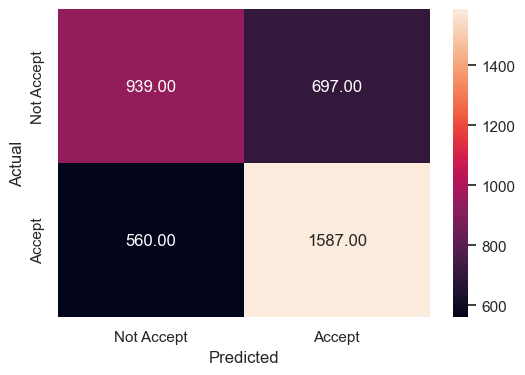

In [433]:
Categorical_NB = CategoricalNB()

#fit for ordinal encoded data
Categorical_NB.fit(X_train_1, y_train)

CNB_pred_1 = Categorical_NB.predict(X_test_1)

metrics_score(y_test, CNB_pred_1)

CNB_accuracy_1 = accuracy_score(y_test, CNB_pred_1)
CNB_recall_1 = recall_score(y_test, CNB_pred_1)
CNB_f1_1 = f1_score(y_test, CNB_pred_1)

CNB_AUC_1 = roc_auc_score(y_test,CNB_pred_1)


- Categorical Naive Bayes with one-hot encoded structure 

              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1636
           1       0.70      0.71      0.70      2147

    accuracy                           0.66      3783
   macro avg       0.65      0.65      0.65      3783
weighted avg       0.66      0.66      0.66      3783



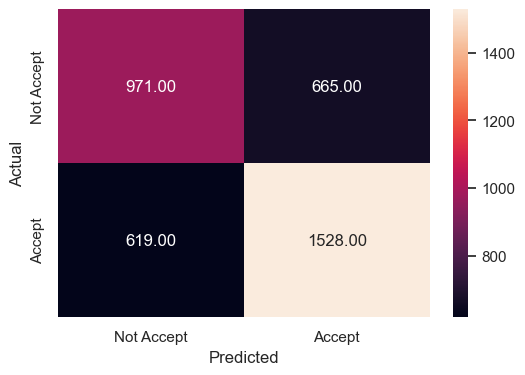

In [434]:
#fit for one-hot encoded data
Categorical_NB.fit(X_train_3, y_train)

CNB_pred_3 = Categorical_NB.predict(X_test_3)

metrics_score(y_test, CNB_pred_3)

CNB_accuracy_3 = accuracy_score(y_test, CNB_pred_3)
CNB_recall_3 = recall_score(y_test, CNB_pred_3)
CNB_f1_3 = f1_score(y_test, CNB_pred_3)

CNB_AUC_3 = roc_auc_score(y_test,CNB_pred_3)

In [435]:
print('AUC_1:', CNB_AUC_1)
print('AUC_2:', CNB_AUC_3)

AUC_1: 0.6565659081928159
AUC_2: 0.6526057568244994


**Observations**

- Guassain naive bayes shows similar results in ordinal encoded and one-hot encoded data, the AUC score is only 0.6

#### 7.2.3 SVM  

- #### SVM with rbf kernel for one-hot encoded data

              precision    recall  f1-score   support

           0       0.74      0.64      0.69      1636
           1       0.75      0.83      0.79      2147

    accuracy                           0.75      3783
   macro avg       0.75      0.74      0.74      3783
weighted avg       0.75      0.75      0.75      3783



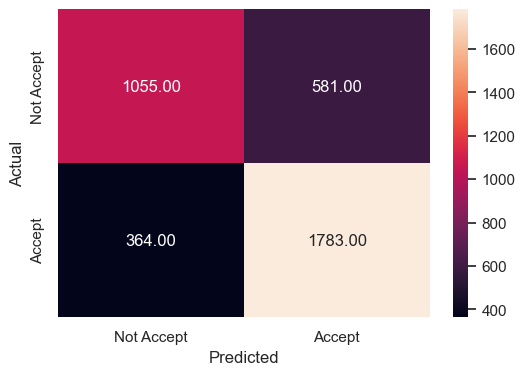

In [436]:
classifier_svm_3 = SVC(kernel = "rbf", random_state = 0)
classifier_svm_3.fit(X_train_3, y_train)

svm_pred_3 = classifier_svm_3.predict(X_test_3)
#cm = confustion_matrix(y, svm_pred_3)
#test_AUC = roc_auc_score(y_test,classifier_svm_3.predict_proba(X_test_3))

#print(cm)
#print(classification_report(y_test, svm_pred_3))
metrics_score(y_test, svm_pred_3)


**Obeservations** 

- SVM performs much better in terms of correct prediction than naive bayes and logistic regression, the recall of SVM with rbf kernel is 0.83. Our dataset is quite complex with wide range of features and subcategories, and SVM is better for this type of data. However, it also takes more time than other models. 

#### 7.2.4 K-nearest Neighbors

- knn with ordinal encoded data

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1636
           1       0.67      0.71      0.69      2147

    accuracy                           0.64      3783
   macro avg       0.63      0.63      0.63      3783
weighted avg       0.64      0.64      0.64      3783



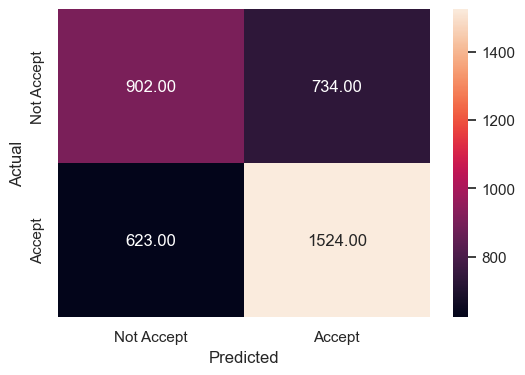

In [437]:
classifier_knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train_1, y_train)

knn_pred_1 = classifier_knn.predict(X_test_1)

metrics_score(y_test, knn_pred_1)

- knn with one-hot encoded data 

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1636
           1       0.70      0.74      0.72      2147

    accuracy                           0.67      3783
   macro avg       0.66      0.66      0.66      3783
weighted avg       0.67      0.67      0.67      3783



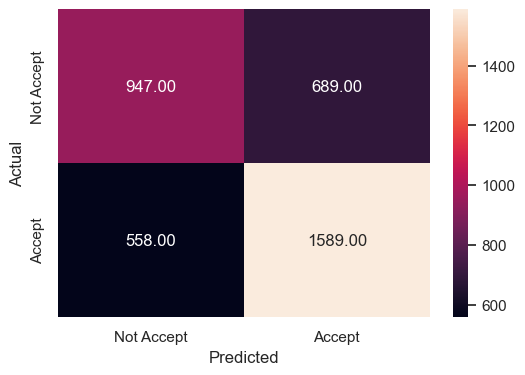

In [438]:

classifier_knn.fit(X_train_3, y_train)

knn_pred_3 = classifier_knn.predict(X_test_3)

metrics_score(y_test, knn_pred_3)

#### 7.2.5 Random Forest

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      1636
           1       0.76      0.81      0.78      2147

    accuracy                           0.74      3783
   macro avg       0.74      0.73      0.74      3783
weighted avg       0.74      0.74      0.74      3783



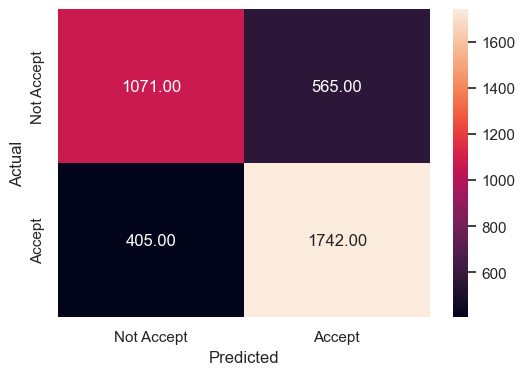

In [484]:
from sklearn.ensemble import RandomForestClassifier

# random forest - ordinal encoded data 
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train_1, y_train)

rf_1_pred = rf.predict(X_test_1)

metrics_score(y_test, rf_1_pred)

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      1636
           1       0.76      0.82      0.79      2147

    accuracy                           0.75      3783
   macro avg       0.75      0.74      0.74      3783
weighted avg       0.75      0.75      0.75      3783



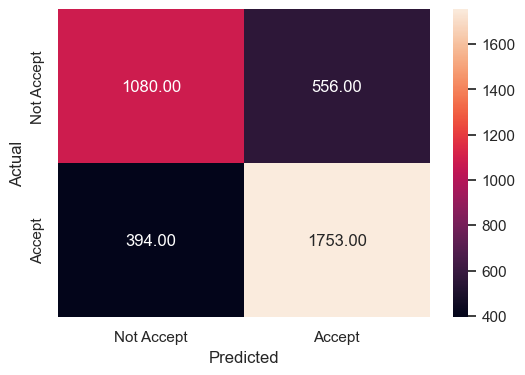

In [485]:
rf.fit(X_train_2, y_train)
rf_2_pred = rf.predict(X_test_2)

metrics_score(y_test, rf_2_pred)

              precision    recall  f1-score   support

           0       0.75      0.66      0.71      1636
           1       0.77      0.83      0.80      2147

    accuracy                           0.76      3783
   macro avg       0.76      0.75      0.75      3783
weighted avg       0.76      0.76      0.76      3783



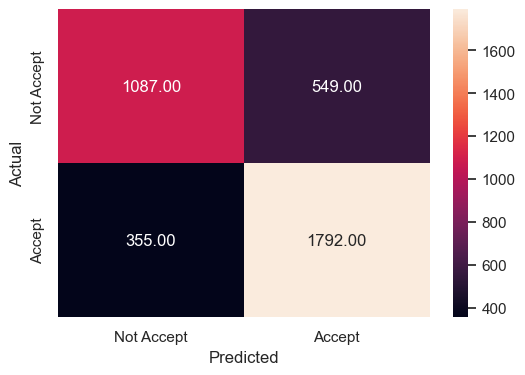

In [486]:
rf.fit(X_train_3, y_train)
rf_3_pred = rf.predict(X_test_3)

metrics_score(y_test, rf_3_pred)

**Observations**

- Random Forest shows similar perform metrics on three dataset, and all of the AUC are higher than other models
- As there prediction matrix showed, this model is good at overall prediction, meaning it correctly predict both negative and positive classes 

#### 7.2.6 Neural Network 

In [442]:
import tensorflow as tf
### Initializing the ANN
ann = tf.keras.models.Sequential()
### Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
### Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
### Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### ANN with ordinal encoded data 

In [443]:
ann.fit(X_train_1, y_train, batch_size = 32, epochs = 100)

ann_pred_1 = ann.predict(X_test_1)
ann_pred_1 = np.where(ann_pred_1 > 0.5, 1, 0)


Epoch 1/100
276/276 [==============================] - 1s 1ms/step - loss: 0.6987 - accuracy: 0.5674
Epoch 2/100
276/276 [==============================] - 0s 980us/step - loss: 0.6846 - accuracy: 0.5678
Epoch 3/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5674
Epoch 4/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5685
Epoch 5/100
276/276 [==============================] - 0s 976us/step - loss: 0.6795 - accuracy: 0.5712
Epoch 6/100
276/276 [==============================] - 0s 966us/step - loss: 0.6749 - accuracy: 0.5796
Epoch 7/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.5888
Epoch 8/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6113
Epoch 9/100
276/276 [==============================] - 0s 996us/step - loss: 0.6501 - accuracy: 0.6190
Epoch 10/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6473 

              precision    recall  f1-score   support

           0       0.60      0.50      0.55      1636
           1       0.66      0.75      0.70      2147

    accuracy                           0.64      3783
   macro avg       0.63      0.62      0.62      3783
weighted avg       0.64      0.64      0.63      3783



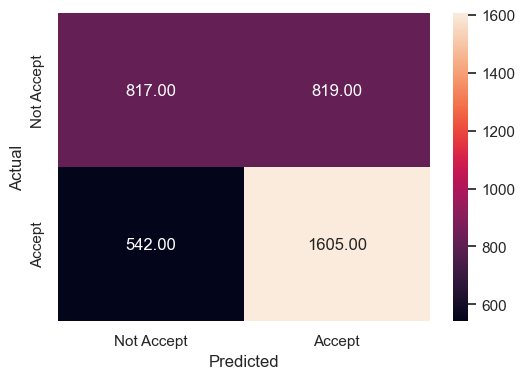

In [444]:
metrics_score(y_test, ann_pred_1)
ann_accuracy_1 = accuracy_score(y_test, ann_pred_1)
ann_recall_1 = recall_score(y_test, ann_pred_1)
ann_f1_1 = f1_score(y_test, ann_pred_1)

ann_AUC_1 = roc_auc_score(y_test,ann_pred_1)


#### ANN with frequency encoded data 

In [445]:
ann.fit(X_train_2, y_train, batch_size = 32, epochs = 100)

ann_pred_2 = ann.predict(X_test_2)
ann_pred_2 = np.where(ann_pred_2 > 0.5, 1, 0)



Epoch 1/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5770
Epoch 2/100
276/276 [==============================] - 0s 992us/step - loss: 0.6727 - accuracy: 0.5881
Epoch 3/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.5926
Epoch 4/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.5932
Epoch 5/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.5951
Epoch 6/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.5966
Epoch 7/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.5969
Epoch 8/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.5995
Epoch 9/100
276/276 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.5986
Epoch 10/100
276/276 [==============================] - 0s 994us/step - loss: 0.6668 - ac

              precision    recall  f1-score   support

           0       0.62      0.36      0.46      1636
           1       0.63      0.83      0.72      2147

    accuracy                           0.63      3783
   macro avg       0.62      0.60      0.59      3783
weighted avg       0.62      0.63      0.60      3783



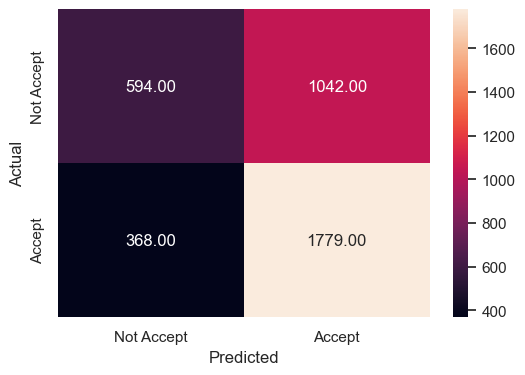

In [446]:
metrics_score(y_test, ann_pred_2)

ann_accuracy_2 = accuracy_score(y_test, ann_pred_2)
ann_recall_2 = recall_score(y_test, ann_pred_2)
ann_f1_2 = f1_score(y_test, ann_pred_2)

ann_AUC_2 = roc_auc_score(y_test,ann_pred_2)

- #### ANN with One-Hot Encoded data 

In [447]:
num_features = 111
ann_3 = tf.keras.models.Sequential()
ann_3.add(tf.keras.layers.Dense(units = 111, activation = 'relu', input_shape= (num_features,)))
ann_3.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann_3.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

ann_3.fit(X_train_3, y_train, batch_size = 32, epochs = 100)
ann_pred_3 = ann_3.predict(X_test_3)
ann_pred_3 = np.where(ann_pred_3 > 0.5, 1, 0)


Epoch 1/100
276/276 [==============================] - 1s 1ms/step - loss: 0.6230 - accuracy: 0.6522
Epoch 2/100
276/276 [==============================] - 0s 1ms/step - loss: 0.5794 - accuracy: 0.6958
Epoch 3/100
276/276 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.7203
Epoch 4/100
276/276 [==============================] - 0s 1ms/step - loss: 0.5252 - accuracy: 0.7414
Epoch 5/100
276/276 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7661
Epoch 6/100
276/276 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.7802
Epoch 7/100
276/276 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.7997
Epoch 8/100
276/276 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8123
Epoch 9/100
276/276 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8182
Epoch 10/100
276/276 [==============================] - 0s 1ms/step - loss: 0.3860 - accura

              precision    recall  f1-score   support

           0       0.70      0.65      0.68      1636
           1       0.75      0.79      0.77      2147

    accuracy                           0.73      3783
   macro avg       0.72      0.72      0.72      3783
weighted avg       0.73      0.73      0.73      3783



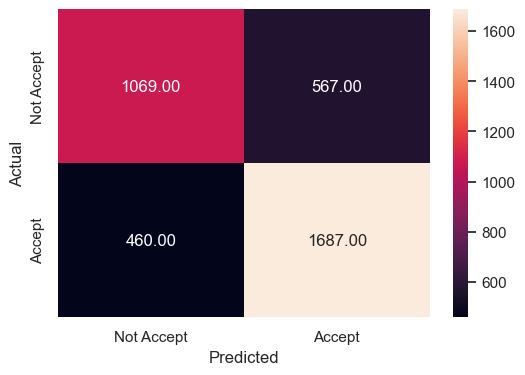

In [448]:
metrics_score(y_test, ann_pred_3)

ann_accuracy_3 = accuracy_score(y_test, ann_pred_3)
ann_recall_3 = recall_score(y_test, ann_pred_3)
ann_f1_3 = f1_score(y_test, ann_pred_3)

ann_AUC_3 = roc_auc_score(y_test,ann_pred_3)

In [449]:
ann_result = pd.DataFrame({
    "Accuracy":[ann_accuracy_1, ann_accuracy_2, ann_accuracy_3], 
    "AUC": [ann_AUC_1, ann_AUC_2, ann_AUC_3],
    "Recall": [ann_recall_1,ann_recall_2, ann_recall_3],  
    "F1": [ann_f1_1,ann_f1_2, ann_f1_3],
}, index = ['ann_Ordinal_enco', 'annn_Freq_encod', 'ann_OneHot_enco'])

#ann_result

**Observations**

- Based on the data complexity, we assumed neural network could be better, but it only shows best AUC 0.72 on one-hot encoded data
- ANN with one-hot encoded data gets 111 fatures, it's hard to break with suitable batch sizes, so we feed the first layer with all features, this is not good for the model learning.
- One big limitation with ANN is our data instances is not big enough for this model
 

## 8. Performance Evaluation

In this section, we evaluate all the models mainly based on AUC score and recall, because AUC is more robust than accuracy as it is not affected by threshhold and can be used to evaluate imbalanced classes. 

- **AUC**: stands for the "area under the vurve" of the receiver operating characteristic(ROC) curve. It gives the information of how much the model predicted, with 1 being perfec prediction.
- **Recall**: stands for the true positive rate, is calculated as TP/(TP + FN). In our company, which focuses on assiting clients with optimizing their marketing strategies to bosst sales, trageting the right customers for coupon distribution is crucial. Recall becomes a key metric in this context, as it measures the proportion of customers interested in coupons that our model correctly identifies. High recall ensures we effectively reach those customers who are most likely to response positively to the marketing efforts, maximizing the impact of our compaigns. 

- ROC curve of SK-learn model with loop through three data structure

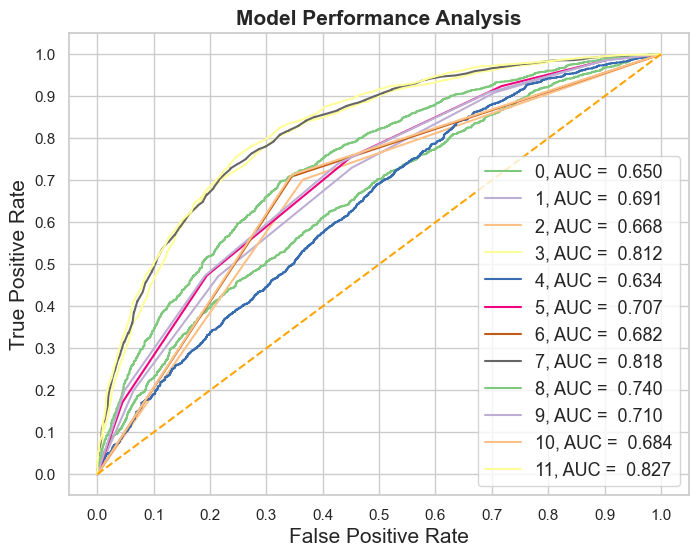

In [450]:
fig = plt.figure()
fig.set_size_inches(8, 6)

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label = '{}, AUC = {: .3F}'.format(i, result_table.loc[i]['AUC']))

plt.plot([0, 1], [0,1], color = 'orange', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step = 0.1))
plt.xlabel('False Positive Rate', fontsize = 15)

plt.yticks(np.arange(0.0, 1.1, step = 0.1))
plt.ylabel('True Positive Rate', fontsize = 15)

plt.title('Model Performance Analysis', fontweight = 'bold', fontsize = 15)
plt.legend(prop = {'size': 13}, loc = 'lower right')

plt.show()

**Observations for SKlearn models**

- In terms of different data structure, ordinal and frequency encoded dataset show similar results for all models, and **one-hot encoded** data shows a slightly higher accuracy score.

- Accross all data structures, **RandomForest** model achieves the highest accuracy score  

#### Randomized search for best model

- SVM

In [451]:

def SVM(X_train, X_test, y_train, y_test, random_state=42):
    
    clf = SVC(C=1.0,kernel='rbf',class_weight='balanced', probability = True)
    param_grid = {'C':[0.1, 1, 10, 50, 100]}
    svm_model = RandomizedSearchCV(clf, param_grid, n_iter = 5, cv=5, scoring='roc_auc', random_state=random_state)
    svm_model.fit(X_train, y_train)
    best_C = svm_model.best_params_['C']

    best_clf = SVC(C=best_C,kernel='rbf',probability=True)
    best_clf.fit(X_train, y_train)

    y_pred = best_clf.predict(X_test)
    #y_proba = best_clf.predict_proba(X_test)[:,1]
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    test_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:,1])

    #logloss = log_loss(y_test, y_proba)

    return accuracy, test_AUC, recall, f1

In [452]:
# Method 1: Ordinal Encoding
SVM_accuracy_1, SVM_AUC_1, SVM_Recall, SVM_f1 = SVM(X_train_1,X_test_1,y_train, y_test)
# Method 2: Frequency Encoding
SVM_accuracy_2, SVM_AUC_2, SVM_Recall_2, SVM_f1_2 = SVM(X_train_2_scaled,X_test_2_scaled,y_train, y_test)
# Method 3: One hot Encoding
SVM_Accuracy_3, SVM_AUC_3, SVM_Recall_3, SVM_f1_3  = SVM(X_train_3,X_test_3,y_train, y_test)

In [453]:
svm_result = pd.DataFrame({
    "Accuracy":[SVM_accuracy_1, SVM_accuracy_2, SVM_Accuracy_3], 
    "AUC": [SVM_AUC_1, SVM_Accuracy_2, SVM_Accuracy_3],
    "Recall": [SVM_RecalL,SVM_Recall_2, SVM_Recall_3],  
    "F1": [SVM_f1,SVM_f1_2, SVM_f1_3],
}, index = ['Ordinal_encoded', 'Freq_encoded', 'OneHot_encoded'])
print("SVM with Cross Validation")
svm_result

SVM with Cross Validation


,Accuracy,AUC,Recall,F1
Ordinal_encoded,0.676183,0.726871,0.767117,0.728922
Freq_encoded,0.702881,0.702881,0.763391,0.744662
OneHot_encoded,0.750198,0.750198,0.830461,0.790512


**Observations**

- By applying cross validation, we fit data to the best model selected by `randomizedSearch`. For SVM, one-hot encoded data has the highest AUC score 0.75
- SVM with one-hot encoded data also achieves 0.83 for recall, with limitation and complexity of our data, SVM_onehot_enco can be used for prediction if we focus more on people who want coupons
  

- KNN with Cross Validation

In [454]:
def KNN(X_train,y_train,X_test,y_test, random_state=42):
  """This function returns accuracy score and AUC of K-Nearest Neighbors Model"""

  knn_model = KNeighborsClassifier()
  param_grid = {'n_neighbors':[11, 15, 21, 31, 41, 51]}
  knn_model = RandomizedSearchCV(knn_model, param_grid, cv=5, scoring='roc_auc')
  knn_model.fit(X_train, y_train)
  best_n_neighbors = knn_model.best_params_['n_neighbors']

  knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  test_AUC = roc_auc_score(y_test,knn_model.predict_proba(X_test)[:,1])
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  return accuracy, test_AUC, recall, f1

In [455]:
# Method 1: Ordinal Encoding
KNN_Accuracy_1, KNN_AUC_1, KNN_recall_1, knn_f1_1 = KNN(X_train_1,y_train,X_test_1,y_test)
# Method 2: Frequency Encoding
KNN_Accuracy_2, KNN_AUC_2, KNN_recall_2, knn_f1_2 = KNN(X_train_2_scaled,y_train,X_test_2_scaled,y_test)
# Method 3: One hot Encoding
KNN_Accuracy_3, KNN_AUC_3, KNN_recall_3, knn_f1_3= KNN(X_train_3,y_train,X_test_3,y_test)

In [456]:
knn_result = pd.DataFrame({
    "Accuracy":[KNN_Accuracy_1, KNN_Accuracy_2, KNN_Accuracy_3], 
    "AUC": [KNN_AUC_1, KNN_AUC_2, KNN_AUC_3],
    "Recall": [KNN_recall_1,KNN_recall_2, KNN_recall_3],  
    "F1": [knn_f1_1,knn_f1_2, knn_f1_3],
}, index = ['Ordinal_encoded', 'Freq_encoded', 'OneHot_encoded'])
print("KNN with Cross Validation")
knn_result

KNN with Cross Validation


,Accuracy,AUC,Recall,F1
Ordinal_encoded,0.652921,0.686315,0.775966,0.717330
Freq_encoded,0.659265,0.691363,0.792734,0.725336
OneHot_encoded,0.706318,0.766186,0.838845,0.764269


**Observations**

- The best performance for model knn is fitted with one-hot encoded data, which achieves AUC score 0.76
- The model also performs well in predicting people who would accpet coupons 

- Random Forest 

In [501]:
def Random_Forest(X_train,y_train,X_test,y_test):
  """This function returns accuracy score & roc_auc_score of Random_Forest Model"""

  clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, n_jobs=-1)
  param_grid = {'max_depth':[None,10, 20, 30, 40, 50, 100], 'n_estimators':[50,100,200]}
  rf_model = RandomizedSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
  rf_model.fit(X_train, y_train)
  best_depth = rf_model.best_params_['max_depth']
  best_n_estimators = rf_model.best_params_['n_estimators']

  clf = RandomForestClassifier(n_estimators=best_n_estimators,criterion='gini',max_depth=best_depth,max_features='log2', random_state=42, n_jobs=-1)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  test_AUC = roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  best_params = rf_model.best_estimator_
  
  #print("Best parameters found: ", best_params)
  
  return accuracy, test_AUC, recall, f1, best_params

In [458]:
# Method 1: Ordinal Encoding
RF_Accuracy_1, RF_AUC_1,RF_recall_1, RF_f1_1  = Random_Forest(X_train_1,y_train,X_test_1,y_test)
# Method 2: Frequency Encoding
RF_Accuracy_2, RF_AUC_2, RF_recall_2, RF_f1_2 = Random_Forest(X_train_2_scaled,y_train,X_test_2_scaled,y_test)
# Method 3: One hot Encoding
RF_Accuracy_3, RF_AUC_3, RF_recall_3, RF_f1_3 = Random_Forest(X_train_3,y_train,X_test_3,y_test)

In [459]:

rf_result = pd.DataFrame({
    "Accuracy":[RF_Accuracy_1, RF_Accuracy_2, RF_Accuracy_3], 
    "AUC": [RF_AUC_1, RF_AUC_2, RF_AUC_3],
    "Recall": [RF_recall_1,RF_recall_2, RF_recall_3],  
    "F1": [RF_f1_1,RF_f1_2, RF_f1_3],
}, index = ['Ordinal_encoded', 'Freq_encoded', 'OneHot_encoded'])
print("Random Forest with Cross Validation")
rf_result

Random Forest with Cross Validation


,Accuracy,AUC,Recall,F1
Ordinal_encoded,0.746497,0.814423,0.824872,0.786936
Freq_encoded,0.748612,0.821618,0.815557,0.786436
OneHot_encoded,0.758128,0.829371,0.851421,0.799825


In [502]:
#BEST PERAMETERS
Random_Forest(X_train_3,y_train,X_test_3,y_test)

(0.7581284694686756,
 0.8300927091079495,
 0.8365160689333955,
 0.7969824717106723,
 RandomForestClassifier(max_depth=100, n_estimators=200, n_jobs=-1,
                        random_state=42))

**Observations**

- Overall, Random forest has the best performance in three datasets among all models as its nature for modeling complex data with categories.

## 9. Model Comparison & Selection

- This section presents the best model with data structures, and illustrates a summary of model performace with different data structures and potential issues like overfitting, biases. 

In [460]:
# model summary for sk-learn models implementation
result_compare

,Datasets,Model Name,AUC,Recall,Precision,F1
0,dataset_ordinal,LogisticRegression,0.649792,0.756404,0.634871,0.690329
1,dataset_ordinal,KNeighborsClassifier,0.690852,0.72939,0.679688,0.703662
2,dataset_ordinal,DecisionTreeClassifier,0.668397,0.698649,0.716332,0.70738
3,dataset_ordinal,RandomForestClassifier,0.811613,0.819283,0.756885,0.786849
4,dataset_freq,LogisticRegression,0.634034,0.797857,0.630939,0.704648
5,dataset_freq,KNeighborsClassifier,0.70728,0.755007,0.687739,0.719805
6,dataset_freq,DecisionTreeClassifier,0.682027,0.706102,0.729548,0.717633
7,dataset_freq,RandomForestClassifier,0.818018,0.80857,0.766108,0.786766
8,dataset_OneHot,LogisticRegression,0.7404,0.770377,0.706838,0.737241
9,dataset_OneHot,KNeighborsClassifier,0.710204,0.739637,0.694359,0.716283


In [461]:
# model summary for cross validation models
index_name = ['svm_Ordinal_enco', 'svm_Freq_enco', 'svm_OneHot_enco', 'knn_Ordinal_enco', 'knn_Freq_enco', 'knn_OneHot_enco', 
              'rf_Ordinal_enco', 'rf_Freq_enco', 'rf_OneHot_enco']
final_result = pd.concat([svm_result, knn_result, rf_result], ignore_index = True)

final_result.index = index_name

final_result

,Accuracy,AUC,Recall,F1
svm_Ordinal_enco,0.676183,0.726871,0.767117,0.728922
svm_Freq_enco,0.702881,0.702881,0.763391,0.744662
svm_OneHot_enco,0.750198,0.750198,0.830461,0.790512
knn_Ordinal_enco,0.652921,0.686315,0.775966,0.717330
knn_Freq_enco,0.659265,0.691363,0.792734,0.725336
knn_OneHot_enco,0.706318,0.766186,0.838845,0.764269
rf_Ordinal_enco,0.746497,0.814423,0.824872,0.786936
rf_Freq_enco,0.748612,0.821618,0.815557,0.786436
rf_OneHot_enco,0.758128,0.829371,0.851421,0.799825


In [462]:
print("ANN result Summary")
ann_result

ANN result Summary


,Accuracy,AUC,Recall,F1
ann_Ordinal_enco,0.640233,0.623472,0.747555,0.702253
annn_Freq_encod,0.627280,0.595839,0.828598,0.716184
ann_OneHot_enco,0.728522,0.719585,0.785748,0.766644


**Summary**

- **Best Performace Model**: Random Forest (average AUC 0.8)
- **Best data structure**: One-hot Encoded data (111 features)
- **High Precision**: Random Forest with one-hot encoded and SVM with one-hot encoded data 
- **Time complexity**: SVM with cross validation, Neural Network
 

- **Recomendations**: Based on current condistions and reserach, our team will recomend **RandomForest** model with one-hot encoded data based on its AUC(0.83) and Recall(0.84)

- **Limitations**: The dataset for this project is complex with 21 features, but only 10,000 instances, and this will not fit for some models that requires more data for training, like neural nwtwork. Other limitations is that the survey data with 10, 000 instances cannot represent a city, so the model's AUC score doesn't mean the model is generalized or ready for market implementation. One-hot encoded data structure has better performace for all models, meaning with more deatailed fatures, the prediction would be more accurate. On the other hand, with wide range of data, the computation cost will increase tremendously if we have a large dataset in the future. Also, it could need to overfitting sometimes.  
